In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
import urllib
import os

In [3]:
df = pd.read_csv('../../data/soc/real-madrid-20-21.csv',header=[1])

df = df[df['Pos'].notna()]
df_example_1 = df[df['Min'] >= 1000].reset_index(drop=True)
df_example_1 = df_example_1[['Player','Pos','MP','Starts','Subs','unSub']]

FINAL TABLE

In [6]:
df_final = df[df['Min'] >= 1000].reset_index(drop=True)
df_final = df_final[['Player', 'Nation', 'Pos', 'Min', 'MP', 'Starts', 'Subs', 'unSub']]
df_final['InSquad'] = df_final['MP'] + df_final['unSub']
df_final = df_final.sort_values(by='Min').reset_index(drop=True)
df_final = df_final[~df_final['Pos'].isna()]
df_final['Nation'] = [x.split(' ')[1].lower() for x in df_final['Nation']]
df_final['Starts_InSquad'] = [f'{x}/{y}' for x,y in zip(df_final['Starts'], df_final['InSquad'])]

In [7]:
def ax_logo(team_id, ax):
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(
        f'{fotmob_url}{team_id}.png'))
    ax.imshow(club_icon)
    ax.axis('off')
    return ax

In [8]:
def minutes_battery(minutes, ax):
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.barh([.5], [1], fc='#EFE9E6', ec='black', height=.35)
    ax.barh([.5], [minutes/(90*38)], fc='#00529F', height=.35)
    text_ = ax.annotate(
        xy=(minutes/(90*38), .5),
        text=f'{minutes/(90*38):.0%}',
        xytext=(-8, 0),
        textcoords='offset points',
        weight='bold',
        color='#EFE9E6',
        va='center',
        ha='center',
        size=5
    )
    ax.set_axis_off()
    return ax


Text(0.15, 0.91, 'Real Madrid 2021/2022 Squad Playing Time')

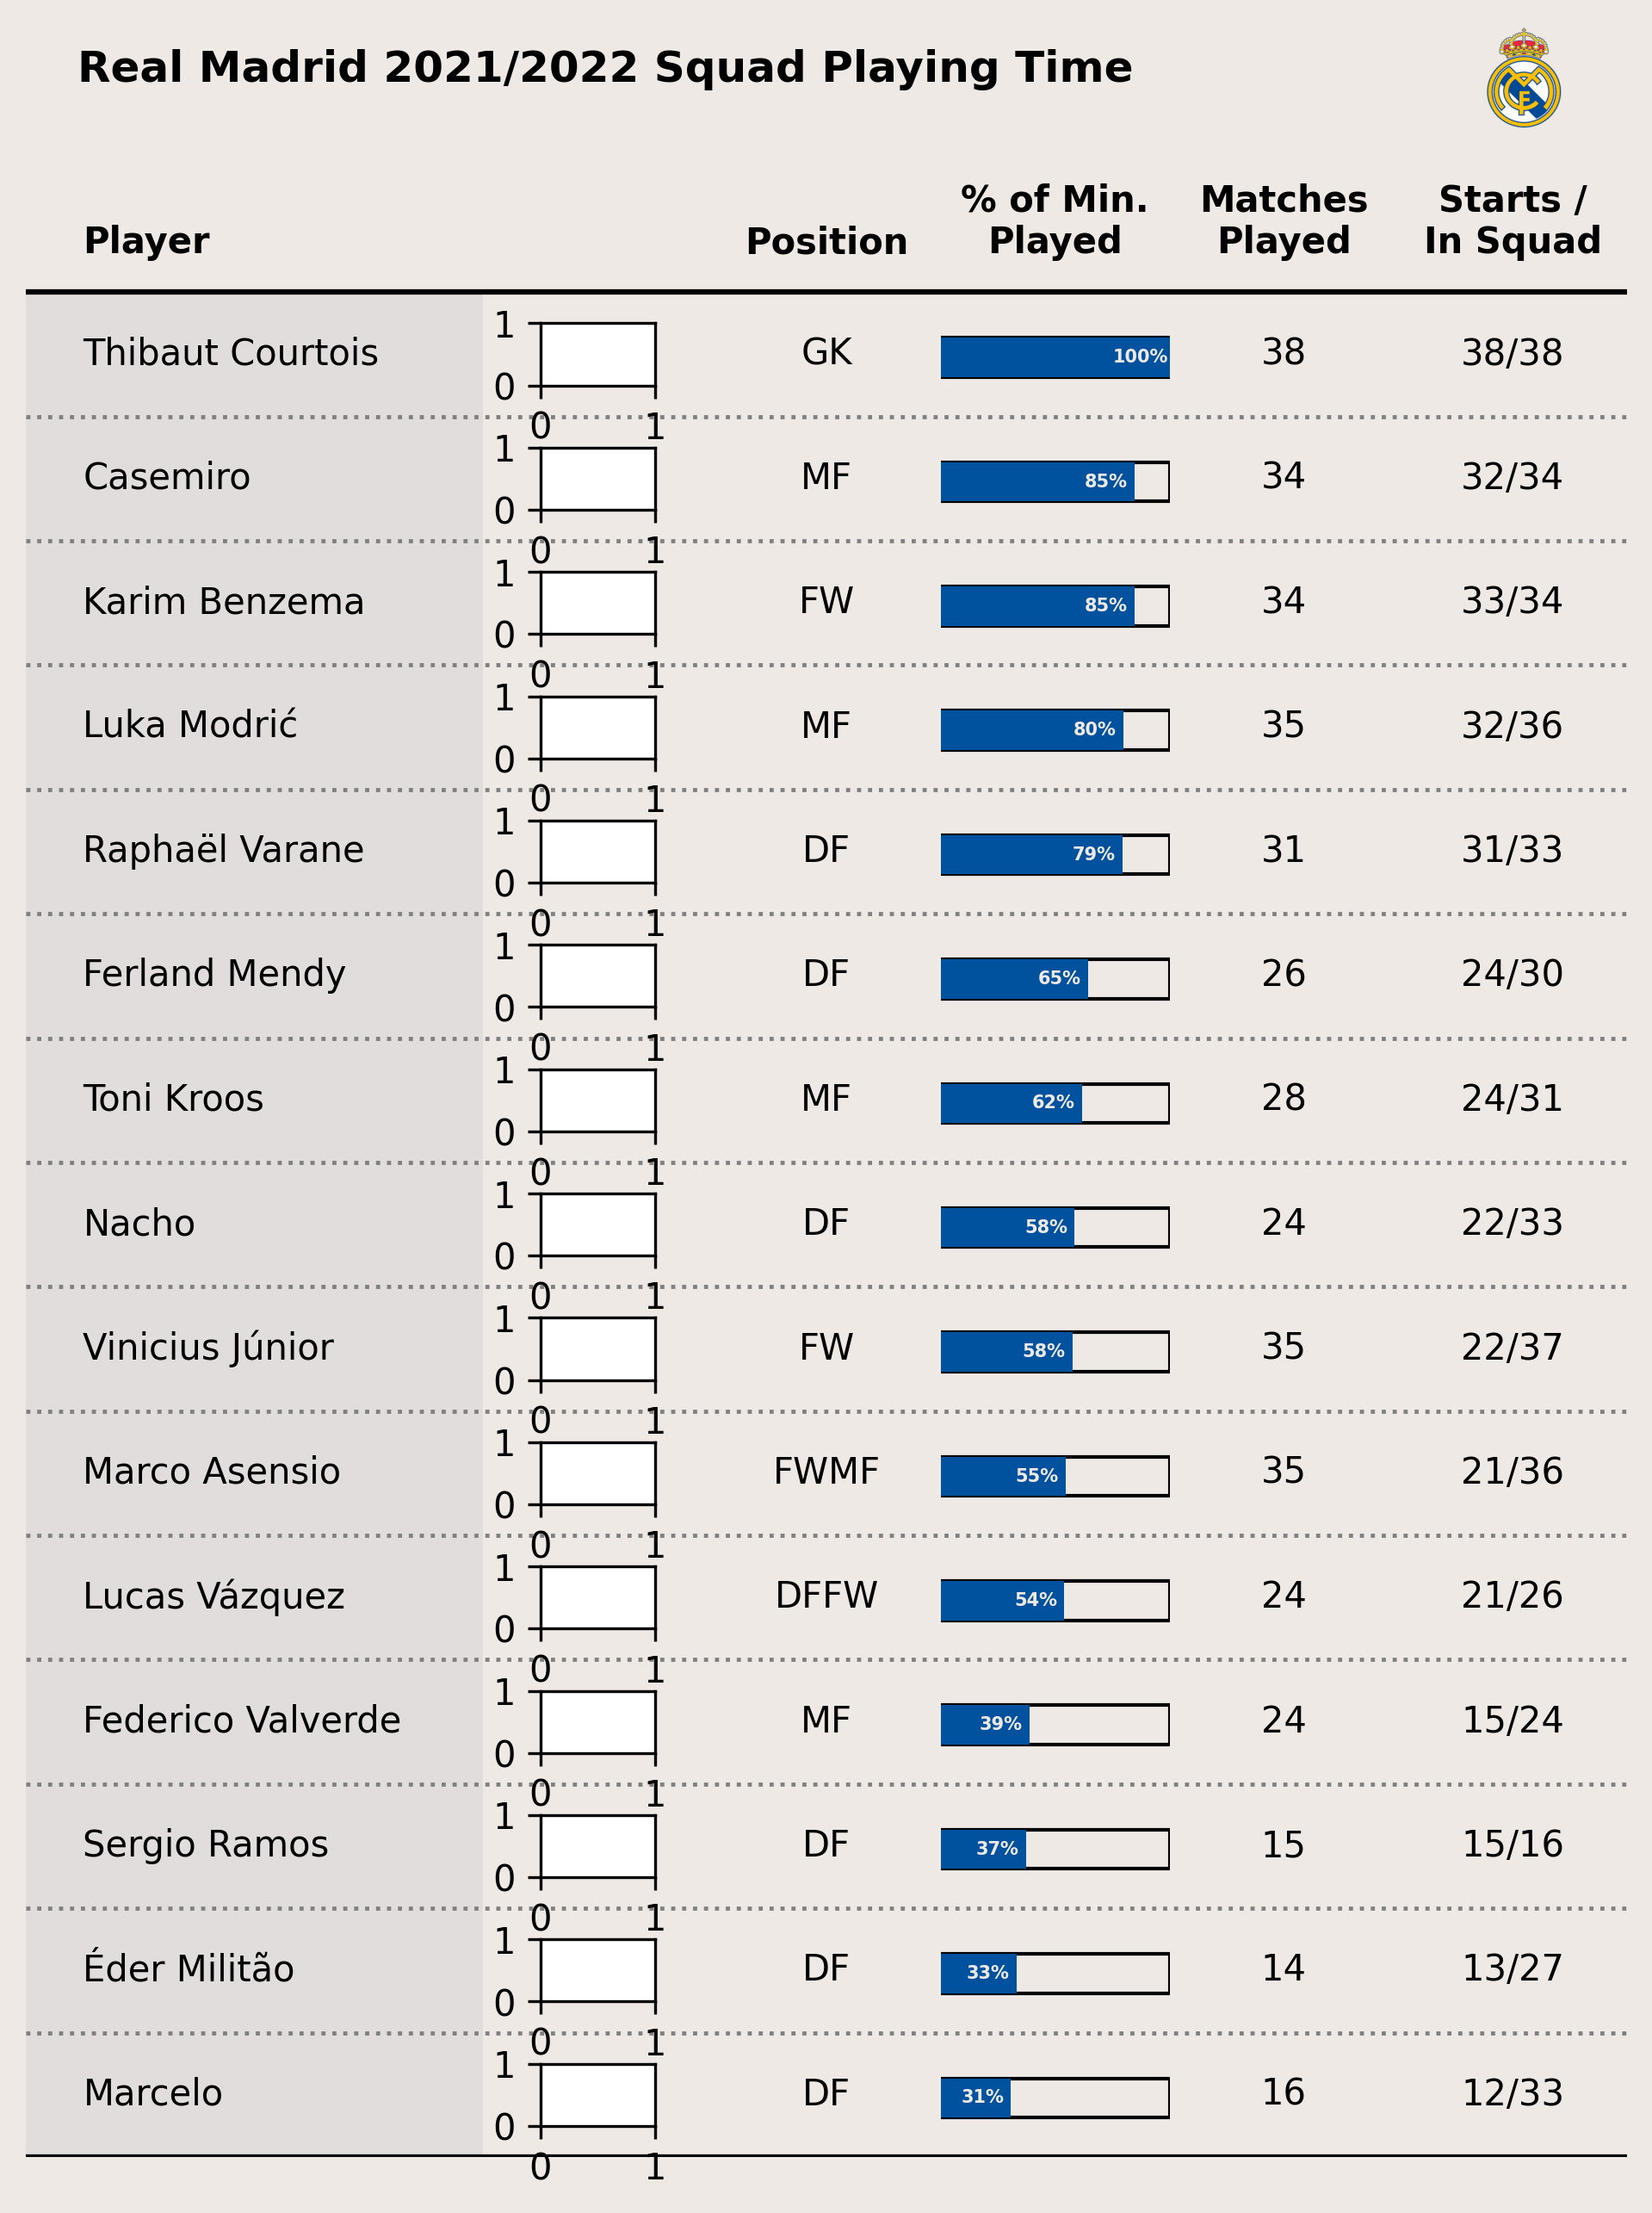

In [12]:
fig = plt.figure(figsize=(8, 10), dpi=300, facecolor='#EFE9E6')
ax = plt.subplot()

ncols = 6
nrows = df_final.shape[0]

ax.set_xlim(0, ncols+1)
ax.set_ylim(0, nrows+1)

positions = [.25, 3.5, 4.5, 5.5, 6.5]
columns = ['Player', 'Pos', 'Min', 'MP', 'Starts_InSquad']

# add table's main text
for i in range(nrows):
    for j, column in enumerate(columns):
        if j == 0:
            ha = 'left'
        else:
            ha = 'center'
        if column == 'Min':
            continue
        else:
            text_label = f'{df_final[column].iloc[i]}'
            weight = 'normal'
        ax.annotate(
            xy=(positions[j], i+.5),
            text=text_label,
            ha=ha,
            va='center',
            weight=weight
        )
# transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# take data coordinates and transform to normalized figure coordinates
def DC_to_NFC(x): return FC_to_NFC(DC_to_FC(x))


# add nation axes
ax_point_1 = DC_to_NFC([2.25, .25])
ax_point_2 = DC_to_NFC([2.75, .75])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([2.25, x + .25])
    flag_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    ax_logo(df_final['Nation'].iloc[x], flag_ax)

# add battery axes
ax_point_1 = DC_to_NFC([4, 0.05])
ax_point_2 = DC_to_NFC([5, 0.95])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([4, x + .025])
    bar_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    minutes_battery(df_final['Min'].iloc[x], bar_ax)

# add column names
column_names = ['Player', 'Position', '% of Min.\nPlayed',
                'Matches\nPlayed', "Starts /\nIn Squad"]
for index, c in enumerate(column_names):
    if index == 0:
        ha = 'left'
    else:
        ha = 'center'
    ax.annotate(
        xy=(positions[index], nrows + .25),
        text=column_names[index],
        ha=ha,
        va='bottom',
        weight='bold'
    )

# add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows],
        lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0],
        lw=1.5, color='black', marker='', zorder=4)
for x in range(1, nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x, x],
            lw=1.15, color='gray', ls=':', zorder=3, marker='')
ax.fill_between(
    x=[0, 2],
    y1=nrows,
    y2=0,
    color='lightgrey',
    alpha=.5,
    ec='None'
)
ax.set_axis_off()
# final details
logo_ax = fig.add_axes(
    [.825, .89, .05, .05]
)
ax_logo(8633, logo_ax)
fig.text(
    x=.15, y=.91,
    s='Real Madrid 2021/2022 Squad Playing Time',
    ha='left',
    va='bottom',
    weight='bold',
    size=12
)

# plt.savefig(
#     'figures/final_table.png',
#     dpi=300,
#     transparent=False,
#     bbox_inches='tight'
# )
